In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import pickle

# Importando variáveis de treino e teste desenvolvidos na etapa de preparação dos dados

In [2]:
def open_train_test():
  with open('train_test.pkl','rb') as f:
    return pickle.load(f)

In [3]:
X_train, X_test, y_train, y_test = open_train_test()

# GridSearchCV
O GridSearchCV é um módulo do Scikit Learn e é amplamente usado para automatizar grande parte do processo de tuning. O objetivo primário do GridSearchCV é a criação de combinações de parâmetros para posteriormente avaliá-las.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

Vamos visualizar os resultados dos testes utitlizando 4 métricas diferentes  
- **Precision**: é usada para medir o desempenho do modelo ao medir a contageem de positivos verdadeiros da maneira correta de todas as previsões positivas feitas.
- **Recall**: é usada para medir o desempenho do modeleo ao medir a contagem de positivos verdadeiros de maneira correta de todos os valores posititvos reais.
- **Precision**: é usada para medir o desempenho do modelo ao medir a razão da soma de positivos verdadeiros e verdadeiros negativos de todas as previsões
- **F1-score**: é a média harmônica de precision e recall e é usada como uma métrica nos cenários em que a escolha de precisão ou pontuação de recall pode resultar em comprometimento em termos de modeleo dando altos falsos positivos e falsos negativos, respectivamente.

In [5]:
metrics = {'accuracy' :make_scorer(accuracy_score),
           'recall'   :make_scorer(recall_score),
           'precision':make_scorer(precision_score),
           'f1'       :make_scorer(fbeta_score, beta = 1)}

## Cross Validation
O Cross validation cria várias combinações diferentes para treino e teste, o que torna o resultado das métricas mais precisa e condinzente com o desempenho real do algoritmo.  

Para definir o número de CV no nosso algoritmto, vamos utilizar o StratifiedShuffleSplit, que fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

cv_sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)

# KNN - K-Nearest Neighbors

## Teste 1
Na primeira etapa de teste do KNN, vamos utilizar o conjunto dos parâmetros possíveis para esse modelo. A partir dos resultados obtidos, vamos realizar o funilamento de parâmetros para extrair a melhor combinação possível

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [8]:
knn_parameters = {
      'n_neighbors': (5, 7, 9, 11, 13, 15)
    , 'weights': ['uniform', 'distance'] 
    , 'algorithm': ['auto','ball_tree','kd_tree','brute']
    , 'p': (1,2)
    , 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
}

In [9]:
def knn_count(df, count = False, **kargs):
  alg, met, n_neig, p_dict, weig = dict(), dict(), dict(), dict(), dict()

  for param in kargs['algorithm']:
    alg[param] = 0
  
  for param in kargs['metric']:
    met[param] = 0
  
  for param in kargs['n_neighbors']:
    n_neig[param] = 0
  
  for param in kargs['p']:
    p_dict[param] = 0
  
  for param in kargs['weights']:
    weig[param] = 0

  knn_params_count = {
        'algorithm': alg
      , 'metric': met
      , 'n_neighbors': n_neig
      , 'p': p_dict
      , 'weights': weig
  }

  if not count:
    count = df.shape[0]

  for i in range(count):
    algorithm   = df['params'][i]['algorithm']
    metric      = df['params'][i]['metric']
    n_neighbors = df['params'][i]['n_neighbors']
    p           = df['params'][i]['p']
    weights     = df['params'][i]['weights']

    knn_params_count['algorithm'][algorithm] += 1
    knn_params_count['metric'][metric] += 1
    knn_params_count['n_neighbors'][n_neighbors] += 1
    knn_params_count['p'][p] += 1
    knn_params_count['weights'][weights] += 1

  return knn_params_count

In [10]:
%%capture
test_1_knn = GridSearchCV(estimator = knn,
                      param_grid = knn_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_1_knn.fit(X_train, y_train)

In [11]:
df_knn_1 = pd.DataFrame(test_1_knn.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_knn_1.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)
df_knn_1.reset_index(drop=True, inplace=True)

In [12]:
print(f"Verificando os 5 melhores resultados das {df_knn_1.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 672 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [13]:
df_knn_1.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'algorithm': 'auto', 'metric': 'manhattan', '...",1,1,1,1,0.839141,0.719856,0.944733,0.816946
1,"{'algorithm': 'auto', 'metric': 'manhattan', '...",1,1,1,1,0.839141,0.719856,0.944733,0.816946
2,"{'algorithm': 'auto', 'metric': 'minkowski', '...",1,1,1,1,0.839141,0.719856,0.944733,0.816946
3,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1,1,1,1,0.839141,0.719856,0.944733,0.816946
4,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1,1,1,1,0.839141,0.719856,0.944733,0.816946


### Realizando a contagem dos parâmetros que foram utitlizados nas 10 melhores classificações

In [15]:
knn_count(df = df_knn_1, count = 10
          , n_neighbors = knn_parameters['n_neighbors']
          , weights = knn_parameters['weights']
          , algorithm = knn_parameters['algorithm']
          , p = knn_parameters['p']
          , metric = knn_parameters['metric'])

{'algorithm': {'auto': 3, 'ball_tree': 3, 'brute': 1, 'kd_tree': 3},
 'metric': {'chebyshev': 0,
  'euclidean': 0,
  'mahalanobis': 0,
  'manhattan': 7,
  'minkowski': 3,
  'seuclidean': 0,
  'wminkowski': 0},
 'n_neighbors': {5: 10, 7: 0, 9: 0, 11: 0, 13: 0, 15: 0},
 'p': {1: 7, 2: 3},
 'weights': {'distance': 10, 'uniform': 0}}

## Teste 2
Vamos utitlizar os parâmetros mais recorrentes nas melhores classificações e realizar uma segunda rodada de testes para determinar a melhor combinação de parâmetros

In [18]:
knn_parameters = {
      'n_neighbors': (3, 4, 5)
    , 'weights': ['distance'] 
    , 'algorithm': ['auto', 'ball_tree','kd_tree']
    , 'p': (1,)
    , 'metric': ['manhattan']
}

In [19]:
%%capture
test_2_knn = GridSearchCV(estimator = knn,
                      param_grid = knn_parameters,
                      cv = cv_sss,
                      scoring = metrics,
                      refit=False)

test_2_knn.fit(X_train, y_train)

In [20]:
df_knn_2 = pd.DataFrame(test_2_knn.cv_results_)[['params', 'rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision','mean_test_accuracy', 'mean_test_recall','mean_test_precision','mean_test_f1']]
df_knn_2.sort_values(by=['rank_test_f1', 'rank_test_accuracy', 'rank_test_recall', 'rank_test_precision'], inplace=True)
df_knn_2.reset_index(drop=True, inplace=True)

In [21]:
print(f"Verificando os 5 melhores resultados das {df_knn_2.shape[0]} combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision")

Verificando os 5 melhores resultados das 9 combinações diferentes ordenados por: rank_test_f1, rank_test_accuracy, rank_test_recall e rank_test_precision


In [22]:
df_knn_2.head()

,params,rank_test_f1,rank_test_accuracy,rank_test_recall,rank_test_precision,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'algorithm': 'auto', 'metric': 'manhattan', '...",1,1,1,1,0.859189,0.753828,0.954295,0.842145
1,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1,1,1,1,0.859189,0.753828,0.954295,0.842145
2,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",1,1,1,1,0.859189,0.753828,0.954295,0.842145
3,"{'algorithm': 'auto', 'metric': 'manhattan', '...",4,4,4,4,0.853103,0.744019,0.950790,0.834673
4,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",4,4,4,4,0.853103,0.744019,0.950790,0.834673


In [23]:
knn_count(df = df_knn_2
          , n_neighbors = knn_parameters['n_neighbors']
          , weights = knn_parameters['weights']
          , algorithm = knn_parameters['algorithm']
          , p = knn_parameters['p']
          , metric = knn_parameters['metric'])

{'algorithm': {'auto': 3, 'ball_tree': 3, 'kd_tree': 3},
 'metric': {'manhattan': 9},
 'n_neighbors': {3: 3, 4: 3, 5: 3},
 'p': {1: 9},
 'weights': {'distance': 9}}

In [24]:
knn_best_param = df_knn_2['params'][0]

In [25]:
algorithm   = knn_best_param['algorithm']
metric      = knn_best_param['metric']
n_neighbors = knn_best_param['n_neighbors']
p           = knn_best_param['p']
weights     = knn_best_param['weights']
knn_best_param

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

# Classificação com os melhores parâmetros

In [26]:
KNN = KNeighborsClassifier(algorithm=algorithm, metric=metric, n_neighbors=n_neighbors, p=p, weights=weights)
KNN.fit(X_train, y_train);
y_pred = KNN.predict(X_test)

In [27]:
print('1: Masculino\n2: Feminino\n',classification_report(y_test, y_pred))

1: Masculino
2: Feminino
               precision    recall  f1-score   support

           1       0.97      0.80      0.88       704
           2       0.83      0.98      0.90       692

    accuracy                           0.89      1396
   macro avg       0.90      0.89      0.89      1396
weighted avg       0.90      0.89      0.89      1396



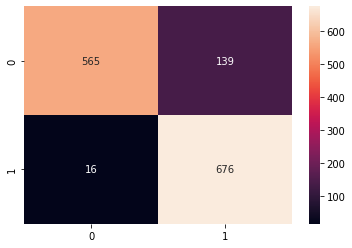

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

# Exportando modelo treinado

In [29]:
path = '/content/drive/MyDrive/Mineração de Dados/IF998 - Missões SMD/Projeto/'
with open(path+'KNN_model.pkl', 'wb') as f:
    pickle.dump([KNN], f) 